<a href="https://colab.research.google.com/github/SainathReddy22/DOCKSHIP_COMPETITON/blob/main/ML_INDIA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv("/content/drive/MyDrive/ml competition/ml india/TRAIN.csv")
data.head()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,2.245295,-1.160960,-1.966682,-1.430190,-0.607246,-1.508696,-0.074415,-0.655096,-1.970141,1.607283,-0.780267,-0.294928,1.236719,-0.135565,-0.832677,-1.400205,0.807960,-0.670317,-0.044106,-0.292081,0.010490,0.521714,-0.064971,0.048849,0.383290,0.103970,-0.047350,-0.064800,74.75,0
1,1,1.278609,0.102574,0.512079,0.003930,-0.723474,-1.334105,0.029958,-0.296595,0.128119,-0.209865,0.188511,0.674525,0.712608,0.122319,1.038024,0.128638,-0.222614,-0.687546,-0.056504,-0.040015,-0.081470,-0.182506,0.078986,0.789993,0.219794,0.938359,-0.078720,0.008119,1.38,0
2,2,1.466457,0.026088,-0.499298,-0.674372,-0.144883,-1.178075,0.058089,-0.420145,-1.359651,0.210249,-0.033777,-0.001594,1.767471,-1.212943,0.427684,1.252714,0.843412,-1.534474,0.830734,0.207653,-0.234087,-0.710542,-0.001242,-0.174713,0.533719,-0.454779,0.001524,0.030935,10.95,0
3,3,-0.922137,-0.371579,2.132018,-0.796997,0.324175,-1.162006,0.277208,-0.249586,-0.775648,-0.061757,-0.959725,0.408746,0.597641,-0.802430,-1.889520,-1.607785,-0.401475,0.729773,-2.445693,-0.461062,-0.302654,-0.246899,-0.045745,0.677110,0.016109,-0.734220,-0.034480,-0.064786,8.04,0
4,4,-1.166525,0.255439,2.108464,0.135019,-0.072979,0.910821,0.755918,0.355528,-0.422820,-0.842826,0.663538,0.624657,0.107262,-0.073654,-0.305506,0.618642,-0.952529,0.757618,-0.375461,0.353355,0.136470,0.017496,0.121017,0.636266,0.492943,-0.750242,0.029124,0.091303,175.00,0


In [5]:
data=data.drop("Index",axis=1)

In [9]:
X = data.drop("Class",axis=1)   #Feature Matrix
y = data["Class"]


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((199118, 29), (85337, 29))

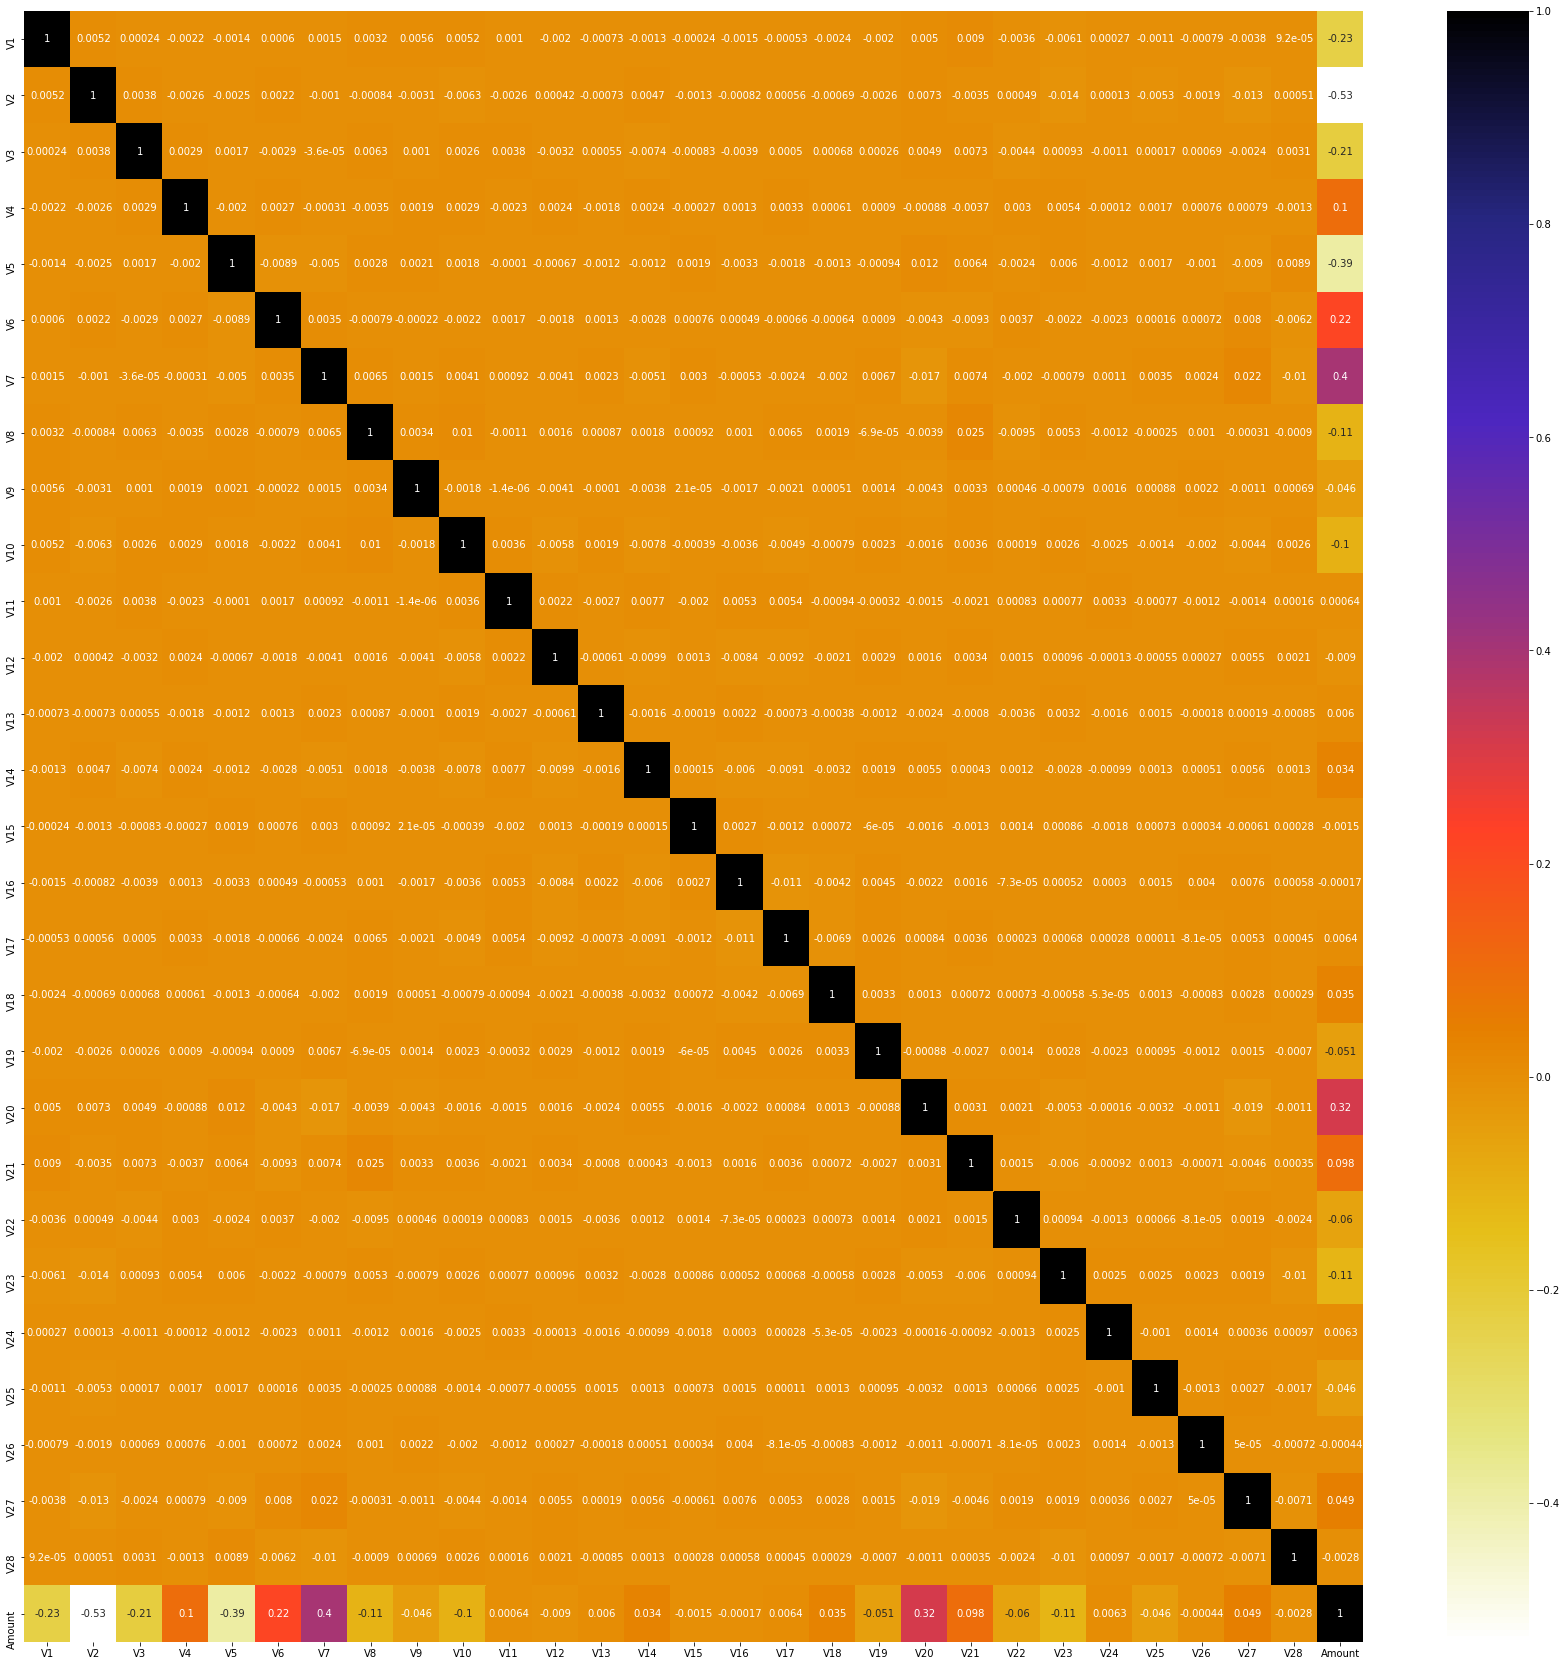

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [8]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [14]:
corr_features = correlation(X_train, 0.5)
len(set(corr_features))

1

In [15]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
38797,1.789094,-1.002888,-1.832529,-0.408904,1.650697,3.960834,-1.119258,1.021418,1.041487,0.013255,-0.242527,0.363871,-0.026105,-0.003904,0.727803,0.197040,-0.568587,-0.059569,-0.481314,0.066011,0.257027,0.642267,0.080658,0.761848,-0.180978,0.442950,-0.007478,-0.036245
38458,2.052733,-0.037702,-1.826004,0.485539,0.535603,-0.785315,0.479831,-0.336450,0.345700,0.108844,-0.985049,0.291104,-0.078241,0.409944,-0.359855,-0.571664,-0.107808,-0.813374,0.123109,-0.178334,-0.024246,0.071498,0.077991,0.654373,0.231879,0.354273,-0.088572,-0.065260
161429,-0.948684,0.692324,0.432214,-0.971814,0.517686,0.848554,2.183637,-0.374054,-0.529890,-0.361518,-0.311436,0.228904,0.677711,-0.172767,-0.774505,0.305095,-1.234119,0.645797,0.687009,0.272666,0.009328,0.385385,-0.630255,-1.300668,1.129257,0.634279,0.003653,-0.193308
238988,-1.543592,1.456824,0.704370,-0.751970,-0.503335,-0.236916,-0.158605,1.113576,-0.360628,-0.667624,0.870349,1.049948,-0.436482,0.740206,-0.775836,0.133701,0.082147,-0.439693,-0.328148,-0.121392,-0.064224,-0.219659,0.057087,0.022085,-0.230171,0.316262,0.169573,0.099764
277538,1.908769,-1.019869,-1.308413,-0.211123,-0.660874,-0.830123,-0.196103,-0.320975,-0.577911,0.881550,-0.651822,0.102514,0.517214,0.145666,0.292266,-1.684661,-0.003801,0.975878,-1.244086,-0.332732,0.020430,0.395259,0.044380,1.141239,-0.049702,0.695335,-0.071937,-0.031116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211871,-0.524239,1.172295,1.586668,0.895586,-0.292756,-0.899381,0.634521,-0.060190,-0.276896,0.073943,-0.382516,-0.647479,-1.223807,0.475299,1.266526,-0.260755,-0.044926,0.122081,0.305459,0.036877,0.034768,0.144519,-0.064901,0.674140,-0.275699,-0.427618,0.264628,0.209338
116230,2.099930,-0.226648,-1.879554,-0.018057,0.557255,-0.229693,0.063330,-0.115782,0.366469,0.311273,0.123236,0.382034,-0.491834,0.564207,-0.606849,0.064520,-0.697311,0.463968,0.453929,-0.190085,0.330975,1.101830,-0.157114,0.195321,0.398796,0.996562,-0.107735,-0.089889
57620,2.059493,0.122688,-1.832911,0.531287,0.122983,-1.489788,0.189063,-0.310974,0.803248,-0.475215,-0.682877,-0.729711,-1.346639,-0.569170,1.069132,0.343159,0.500986,0.761085,-0.384249,-0.279334,0.166539,0.585529,-0.026849,-0.220132,0.225670,-0.090044,-0.010844,-0.032689
254990,2.000094,0.570525,-1.309522,3.564532,0.978831,0.155362,0.397181,-0.094327,-0.889138,1.488781,-2.240432,-1.040702,-0.893986,0.520841,-0.761758,0.897619,-0.928454,-0.415044,-1.013062,-0.334833,-0.218148,-0.641862,0.121979,-1.144963,0.051614,-0.104565,-0.056149,-0.063644


In [16]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression()

In [20]:

model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:

y_predicted = model.predict(X_test)

In [22]:
model.score(X_test,y_test)

0.9992969052111043

In [23]:
test_data = pd.read_csv('/content/drive/MyDrive/ml competition/ml india/TEST.csv')

In [24]:
test_data.head()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,1.755477,-0.860198,-1.629185,0.164162,0.027778,-0.330613,0.216770,-0.215280,1.187584,-0.291611,-1.883296,0.107464,-0.180398,0.138906,-0.105876,-0.229330,-0.401810,-0.330877,0.620971,0.135129,-0.122173,-0.503867,-0.063954,-1.047319,-0.016514,-0.039022,-0.058861,-0.035955,186.76
1,1,-0.706506,1.155627,1.132585,2.742101,1.203095,0.013641,1.200743,-0.273633,-1.323403,1.138185,-1.275816,-1.087457,-0.936612,-0.041733,-1.153523,0.551025,-0.829644,-0.069660,-1.874384,-0.281283,0.352723,1.142657,-0.156382,1.139391,-0.151635,0.063306,-0.284146,-0.015198,21.18
2,2,1.043717,-0.928666,0.643312,-2.093695,-0.527878,1.420413,-1.053914,0.702897,2.450726,-1.767777,2.057099,2.184425,-0.470463,-0.016315,1.027377,-2.374469,1.332018,-1.536175,0.206623,-0.264045,0.008873,0.568767,0.070359,-0.978165,0.258814,-0.726163,0.176843,0.005530,1.00
3,3,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,-3.679659,-7.524368,2.954344,-7.099825,1.520369,-7.687803,-0.225002,-8.520850,-13.277300,-5.253705,3.623332,0.579098,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,14.46
4,4,1.187587,0.173589,0.104741,1.143172,0.164552,0.162763,0.097302,0.001023,-0.013501,0.060962,0.318420,1.224034,0.632704,0.053400,-1.059099,-0.023212,-0.603919,0.155364,0.580959,-0.039666,-0.112873,-0.163529,-0.231334,-0.469322,0.832111,-0.312343,0.019521,0.005464,27.00


In [26]:
test_data = test_data.drop("Index",axis=1)

In [27]:
test_data.drop(corr_features,axis=1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,1.755477,-0.860198,-1.629185,0.164162,0.027778,-0.330613,0.216770,-0.215280,1.187584,-0.291611,-1.883296,0.107464,-0.180398,0.138906,-0.105876,-0.229330,-0.401810,-0.330877,0.620971,0.135129,-0.122173,-0.503867,-0.063954,-1.047319,-0.016514,-0.039022,-0.058861,-0.035955
1,-0.706506,1.155627,1.132585,2.742101,1.203095,0.013641,1.200743,-0.273633,-1.323403,1.138185,-1.275816,-1.087457,-0.936612,-0.041733,-1.153523,0.551025,-0.829644,-0.069660,-1.874384,-0.281283,0.352723,1.142657,-0.156382,1.139391,-0.151635,0.063306,-0.284146,-0.015198
2,1.043717,-0.928666,0.643312,-2.093695,-0.527878,1.420413,-1.053914,0.702897,2.450726,-1.767777,2.057099,2.184425,-0.470463,-0.016315,1.027377,-2.374469,1.332018,-1.536175,0.206623,-0.264045,0.008873,0.568767,0.070359,-0.978165,0.258814,-0.726163,0.176843,0.005530
3,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,-3.679659,-7.524368,2.954344,-7.099825,1.520369,-7.687803,-0.225002,-8.520850,-13.277300,-5.253705,3.623332,0.579098,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757
4,1.187587,0.173589,0.104741,1.143172,0.164552,0.162763,0.097302,0.001023,-0.013501,0.060962,0.318420,1.224034,0.632704,0.053400,-1.059099,-0.023212,-0.603919,0.155364,0.580959,-0.039666,-0.112873,-0.163529,-0.231334,-0.469322,0.832111,-0.312343,0.019521,0.005464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,-2.740483,3.658095,-4.110636,5.340242,-2.666775,-0.092782,-4.388699,-0.280133,-2.821895,-4.466284,3.969800,-7.346717,-1.163312,-8.225569,0.825002,-6.772867,-8.815785,-4.568859,1.126599,0.185325,2.417495,-0.097712,0.382155,-0.154757,-0.403956,0.277895,0.830062,0.218690
348,1.996699,0.022006,-1.577423,0.281773,0.472021,-0.183526,-0.131080,-0.044925,0.325681,-0.334861,1.036165,1.209054,1.154979,-1.255781,-0.346951,0.804158,0.096727,0.662578,0.186063,-0.013068,-0.074329,-0.092318,0.151294,0.231576,-0.157721,0.376819,-0.042319,-0.030305
349,-0.626910,1.574059,0.518148,3.350490,0.840725,0.540113,0.772164,0.493990,-2.406775,0.855991,0.007051,0.447769,0.400501,0.653357,-1.669684,0.492993,-0.467006,-0.029953,0.062356,-0.036845,-0.004328,-0.223672,0.093403,-0.439572,-0.597478,-0.163450,0.037360,0.107155
350,-0.262802,0.971561,0.107488,-0.642781,0.369554,-0.925605,1.187334,-0.236083,0.026680,-0.161179,-0.781647,0.538015,0.790118,-0.111076,-0.409769,-0.170284,-0.437303,-0.916822,-0.166333,0.142667,-0.283814,-0.518704,0.129107,-0.073293,-0.403226,0.151587,0.377947,0.153047


In [28]:
target = model.predict(test_data)

In [30]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(target) # target are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('submission.csv')         
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random forest


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc = RandomForestClassifier()

In [33]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
pred = rfc.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
print('Accuracy Score is: ', np.sqrt(accuracy_score(y_test, pred))) 

Accuracy Score is:  0.9997949096555474


In [38]:
target =rfc.predict(test_data)

In [39]:
res = pd.DataFrame(target) # target are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('submission.csv')         
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ANN


In [40]:
import tensorflow as tf
from tensorflow import keras
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


In [41]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/ml competition/ml india/TRAIN.csv")
data.head()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,2.245295,-1.160960,-1.966682,-1.430190,-0.607246,-1.508696,-0.074415,-0.655096,-1.970141,1.607283,-0.780267,-0.294928,1.236719,-0.135565,-0.832677,-1.400205,0.807960,-0.670317,-0.044106,-0.292081,0.010490,0.521714,-0.064971,0.048849,0.383290,0.103970,-0.047350,-0.064800,74.75,0
1,1,1.278609,0.102574,0.512079,0.003930,-0.723474,-1.334105,0.029958,-0.296595,0.128119,-0.209865,0.188511,0.674525,0.712608,0.122319,1.038024,0.128638,-0.222614,-0.687546,-0.056504,-0.040015,-0.081470,-0.182506,0.078986,0.789993,0.219794,0.938359,-0.078720,0.008119,1.38,0
2,2,1.466457,0.026088,-0.499298,-0.674372,-0.144883,-1.178075,0.058089,-0.420145,-1.359651,0.210249,-0.033777,-0.001594,1.767471,-1.212943,0.427684,1.252714,0.843412,-1.534474,0.830734,0.207653,-0.234087,-0.710542,-0.001242,-0.174713,0.533719,-0.454779,0.001524,0.030935,10.95,0
3,3,-0.922137,-0.371579,2.132018,-0.796997,0.324175,-1.162006,0.277208,-0.249586,-0.775648,-0.061757,-0.959725,0.408746,0.597641,-0.802430,-1.889520,-1.607785,-0.401475,0.729773,-2.445693,-0.461062,-0.302654,-0.246899,-0.045745,0.677110,0.016109,-0.734220,-0.034480,-0.064786,8.04,0
4,4,-1.166525,0.255439,2.108464,0.135019,-0.072979,0.910821,0.755918,0.355528,-0.422820,-0.842826,0.663538,0.624657,0.107262,-0.073654,-0.305506,0.618642,-0.952529,0.757618,-0.375461,0.353355,0.136470,0.017496,0.121017,0.636266,0.492943,-0.750242,0.029124,0.091303,175.00,0


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
from sklearn.utils import resample
data_majority = data[data.Class==0]
data_minority = data[data.Class!=0]
data_minority
 
 #Downsample majority class
data_majority_downsampled = resample(data_majority,replace=False,n_samples=500,random_state=123) 
 


In [49]:
dataset1 = pd.concat([data_majority_downsampled, data_minority])
 
# Display new class counts
data.Class.value_counts()
dataset1

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5557,5557,-0.286506,1.483877,1.296656,1.830624,0.804772,-0.620905,1.537253,-0.533306,-1.574283,0.585061,-0.391437,0.085668,1.013337,-0.067326,-0.091619,0.096048,-0.640788,-0.510616,-0.750035,0.020316,0.035584,0.220838,-0.294050,0.421327,0.292934,-0.017196,-0.300206,-0.210138,20.00,0
189143,189143,0.027315,-2.962887,0.323169,-0.062928,-1.823663,0.883502,-0.427193,0.174294,-0.220772,0.197776,0.867747,0.588848,0.372375,-0.614239,-1.051076,0.812886,0.603264,-1.286998,0.762201,1.373300,0.455065,0.028891,-0.591603,-0.244121,0.095391,-0.281050,-0.054412,0.121573,657.55,0
217166,217166,1.161457,0.342126,0.596969,1.137035,-0.289921,-0.597790,0.093898,-0.114521,-0.085083,-0.071066,0.275224,0.815874,0.715484,0.230024,1.166685,-0.249527,-0.120944,-0.814322,-0.860259,-0.128026,0.005647,0.107395,0.038325,0.402180,0.449769,-0.431766,0.043762,0.027593,7.19,0
44582,44582,1.935320,-0.571370,-0.875981,-0.098773,0.061064,0.634513,-0.573312,0.165900,0.777935,0.111132,0.048667,1.079360,0.982807,-0.120085,-0.116394,0.953468,-1.217769,0.380287,0.610641,0.046221,-0.199225,-0.619102,0.254756,-0.334198,-0.501719,0.278271,-0.050622,-0.045397,64.00,0
152158,152158,1.119941,-0.216024,1.362047,0.959006,-1.276754,-0.491515,-0.592218,0.046830,0.910009,-0.249010,-0.443562,0.536990,-0.034620,-0.377712,0.180358,0.070765,-0.053027,-0.336049,-0.170090,-0.072864,-0.058449,-0.021478,0.054220,0.747833,0.202373,0.294721,0.013497,0.033920,28.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279108,279108,-1.322789,1.552768,-2.276921,2.992117,-1.947064,-0.480288,-1.362388,0.953242,-2.329629,-3.393553,3.128440,-3.570394,-0.595198,-3.988415,0.995906,-2.843785,-4.826246,-0.703883,2.152215,0.988493,0.614969,-0.195200,0.590711,-0.233378,-0.164285,-0.277498,0.428610,0.246394,270.00,1
279194,279194,-18.474868,11.586381,-21.402917,6.038515,-14.451158,-4.146524,-14.856124,12.431140,-4.053353,-9.040396,5.966203,-8.463966,0.078692,-9.092533,0.010822,-7.186376,-13.797475,-4.958494,1.321167,1.577924,1.741136,-1.251138,-0.396219,0.095706,1.322751,-0.217955,1.628793,0.482248,99.99,1
279528,279528,0.378275,3.914797,-5.726872,6.094141,1.698875,-2.807314,-0.591118,-0.123496,-2.530713,-5.153095,4.654088,-7.839539,1.371819,-9.634690,-0.739597,-0.663204,0.891935,0.978676,-2.005477,0.440439,0.149896,-0.601967,-0.613724,-0.403114,1.568445,0.521884,0.527938,0.411910,1.00,1
280854,280854,-1.201398,4.864535,-8.328823,7.652399,-0.167445,-2.767695,-3.176421,1.623279,-4.367228,-5.533443,4.106405,-6.331825,0.671785,-12.156587,1.020252,-2.110863,-1.558545,0.195992,0.502453,0.597026,0.532320,-0.556913,0.192444,-0.698588,0.025003,0.514968,0.378105,-0.053133,0.77,1


In [50]:
inputs=dataset1.drop(["Index","Class"],axis="columns")
target=dataset1["Class"]
inputs

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
5557,-0.286506,1.483877,1.296656,1.830624,0.804772,-0.620905,1.537253,-0.533306,-1.574283,0.585061,-0.391437,0.085668,1.013337,-0.067326,-0.091619,0.096048,-0.640788,-0.510616,-0.750035,0.020316,0.035584,0.220838,-0.294050,0.421327,0.292934,-0.017196,-0.300206,-0.210138,20.00
189143,0.027315,-2.962887,0.323169,-0.062928,-1.823663,0.883502,-0.427193,0.174294,-0.220772,0.197776,0.867747,0.588848,0.372375,-0.614239,-1.051076,0.812886,0.603264,-1.286998,0.762201,1.373300,0.455065,0.028891,-0.591603,-0.244121,0.095391,-0.281050,-0.054412,0.121573,657.55
217166,1.161457,0.342126,0.596969,1.137035,-0.289921,-0.597790,0.093898,-0.114521,-0.085083,-0.071066,0.275224,0.815874,0.715484,0.230024,1.166685,-0.249527,-0.120944,-0.814322,-0.860259,-0.128026,0.005647,0.107395,0.038325,0.402180,0.449769,-0.431766,0.043762,0.027593,7.19
44582,1.935320,-0.571370,-0.875981,-0.098773,0.061064,0.634513,-0.573312,0.165900,0.777935,0.111132,0.048667,1.079360,0.982807,-0.120085,-0.116394,0.953468,-1.217769,0.380287,0.610641,0.046221,-0.199225,-0.619102,0.254756,-0.334198,-0.501719,0.278271,-0.050622,-0.045397,64.00
152158,1.119941,-0.216024,1.362047,0.959006,-1.276754,-0.491515,-0.592218,0.046830,0.910009,-0.249010,-0.443562,0.536990,-0.034620,-0.377712,0.180358,0.070765,-0.053027,-0.336049,-0.170090,-0.072864,-0.058449,-0.021478,0.054220,0.747833,0.202373,0.294721,0.013497,0.033920,28.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279108,-1.322789,1.552768,-2.276921,2.992117,-1.947064,-0.480288,-1.362388,0.953242,-2.329629,-3.393553,3.128440,-3.570394,-0.595198,-3.988415,0.995906,-2.843785,-4.826246,-0.703883,2.152215,0.988493,0.614969,-0.195200,0.590711,-0.233378,-0.164285,-0.277498,0.428610,0.246394,270.00
279194,-18.474868,11.586381,-21.402917,6.038515,-14.451158,-4.146524,-14.856124,12.431140,-4.053353,-9.040396,5.966203,-8.463966,0.078692,-9.092533,0.010822,-7.186376,-13.797475,-4.958494,1.321167,1.577924,1.741136,-1.251138,-0.396219,0.095706,1.322751,-0.217955,1.628793,0.482248,99.99
279528,0.378275,3.914797,-5.726872,6.094141,1.698875,-2.807314,-0.591118,-0.123496,-2.530713,-5.153095,4.654088,-7.839539,1.371819,-9.634690,-0.739597,-0.663204,0.891935,0.978676,-2.005477,0.440439,0.149896,-0.601967,-0.613724,-0.403114,1.568445,0.521884,0.527938,0.411910,1.00
280854,-1.201398,4.864535,-8.328823,7.652399,-0.167445,-2.767695,-3.176421,1.623279,-4.367228,-5.533443,4.106405,-6.331825,0.671785,-12.156587,1.020252,-2.110863,-1.558545,0.195992,0.502453,0.597026,0.532320,-0.556913,0.192444,-0.698588,0.025003,0.514968,0.378105,-0.053133,0.77


In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)
dataset=pd.concat([X_train,y_train ], axis=1, sort=False)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
x_train = scaler.fit_transform(X_train) 
x_test = scaler.transform(X_test)

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
model1=GradientBoostingClassifier(n_estimators=200,max_depth=12,learning_rate=0.2)

In [55]:
model1.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=12,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [56]:
model1.score(x_test,y_test)

0.8882978723404256

In [58]:
inputs1=data.drop(["Index","Class"],axis="columns")
target1=data["Class"]
inputs1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,2.245295,-1.160960,-1.966682,-1.430190,-0.607246,-1.508696,-0.074415,-0.655096,-1.970141,1.607283,-0.780267,-0.294928,1.236719,-0.135565,-0.832677,-1.400205,0.807960,-0.670317,-0.044106,-0.292081,0.010490,0.521714,-0.064971,0.048849,0.383290,0.103970,-0.047350,-0.064800,74.75
1,1.278609,0.102574,0.512079,0.003930,-0.723474,-1.334105,0.029958,-0.296595,0.128119,-0.209865,0.188511,0.674525,0.712608,0.122319,1.038024,0.128638,-0.222614,-0.687546,-0.056504,-0.040015,-0.081470,-0.182506,0.078986,0.789993,0.219794,0.938359,-0.078720,0.008119,1.38
2,1.466457,0.026088,-0.499298,-0.674372,-0.144883,-1.178075,0.058089,-0.420145,-1.359651,0.210249,-0.033777,-0.001594,1.767471,-1.212943,0.427684,1.252714,0.843412,-1.534474,0.830734,0.207653,-0.234087,-0.710542,-0.001242,-0.174713,0.533719,-0.454779,0.001524,0.030935,10.95
3,-0.922137,-0.371579,2.132018,-0.796997,0.324175,-1.162006,0.277208,-0.249586,-0.775648,-0.061757,-0.959725,0.408746,0.597641,-0.802430,-1.889520,-1.607785,-0.401475,0.729773,-2.445693,-0.461062,-0.302654,-0.246899,-0.045745,0.677110,0.016109,-0.734220,-0.034480,-0.064786,8.04
4,-1.166525,0.255439,2.108464,0.135019,-0.072979,0.910821,0.755918,0.355528,-0.422820,-0.842826,0.663538,0.624657,0.107262,-0.073654,-0.305506,0.618642,-0.952529,0.757618,-0.375461,0.353355,0.136470,0.017496,0.121017,0.636266,0.492943,-0.750242,0.029124,0.091303,175.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284450,1.216221,0.095995,0.666817,1.850616,-0.516269,-0.267296,-0.183114,-0.104976,-1.985790,1.442988,-0.153159,0.143619,0.923098,0.095348,0.439161,-1.330980,0.021354,0.416465,-2.256853,-0.528517,-0.286826,-0.347838,0.072935,0.367923,0.358108,0.044019,0.027223,0.028017,19.46
284451,1.429502,-0.990271,-0.224429,-1.808740,0.770788,3.730989,-1.914212,1.036385,-0.316971,0.646103,-0.100190,-0.751095,0.437456,-0.504131,1.491844,2.024039,-0.554936,-0.204874,0.477147,0.206332,0.376136,0.928723,-0.108174,1.048922,0.481214,-0.026342,0.062900,0.024639,0.02
284452,2.041198,-0.218276,-1.405547,0.187570,0.001916,-0.781668,-0.043787,-0.090115,0.677407,0.227002,0.439484,-0.085891,-1.801888,1.007830,0.348531,0.140724,-0.729001,0.717937,0.099021,-0.348353,0.273900,0.844092,-0.023770,-0.407890,0.190140,-0.089576,-0.029237,-0.075626,1.00
284453,1.857451,0.071823,-0.086963,3.553877,0.082026,1.245277,-0.788886,0.467363,-0.271086,1.574760,-0.443961,-0.501712,-1.357095,0.173390,-1.039803,1.643621,-1.299847,0.922837,-1.231397,-0.306389,0.170106,0.451313,0.157898,0.129330,-0.228721,0.012281,-0.003598,-0.041590,11.31


In [59]:
X1_train,X1_test,y1_train,y1_test=train_test_split(inputs1,target1,test_size=0.4)

In [60]:
x1_train = scaler.fit_transform(X1_train) 
x1_test = scaler.transform(X1_test)

In [61]:
model2=GradientBoostingClassifier(n_estimators=200,max_depth=12,learning_rate=0.2)

In [62]:
model2.fit(x1_train,y1_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=12,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [63]:
model2.score(x1_test,y1_test)

0.9991914362552952